In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
warnings.filterwarnings("ignore")

# Data Ingestion:

In [91]:
df =pd.read_csv("mushrooms.csv")

## EDA & Transformation

In [92]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [93]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [94]:
df.shape

(8124, 23)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [96]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [97]:
for column in df.columns:
    print("column name :",column)
    print("--------------------------------------")
    print(df[column].unique(),"no. of unique",df[column].nunique())
    print("--------------------------------------")

column name : class
--------------------------------------
['p' 'e'] no. of unique 2
--------------------------------------
column name : cap-shape
--------------------------------------
['x' 'b' 's' 'f' 'k' 'c'] no. of unique 6
--------------------------------------
column name : cap-surface
--------------------------------------
['s' 'y' 'f' 'g'] no. of unique 4
--------------------------------------
column name : cap-color
--------------------------------------
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r'] no. of unique 10
--------------------------------------
column name : bruises
--------------------------------------
['t' 'f'] no. of unique 2
--------------------------------------
column name : odor
--------------------------------------
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm'] no. of unique 9
--------------------------------------
column name : gill-attachment
--------------------------------------
['f' 'a'] no. of unique 2
--------------------------------------
column name : gill-spa

In [98]:
df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [99]:
# edible, poisonous
target ={"e":0,"p":1}

In [100]:
df["class"] =df["class"].map(target)
df["class"].unique()

array([1, 0], dtype=int64)

In [101]:
df["veil-type"].unique()

array(['p'], dtype=object)

* vell-type contain only one type ,so this feature is not useful ,we can drop veil type column

In [102]:
df.drop("veil-type",axis =1,inplace=True)

* stalk-root contain "?" symbol which indecates nan values

In [103]:
# replacing "?" with np.nan
df["stalk-root"]=df["stalk-root"].replace("?",np.nan)

In [104]:
df["stalk-root"].unique()

array(['e', 'c', 'b', 'r', nan], dtype=object)

In [105]:
df["cap-shape"].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [106]:
df.isnull().sum()/df.shape[0]

class                       0.000000
cap-shape                   0.000000
cap-surface                 0.000000
cap-color                   0.000000
bruises                     0.000000
odor                        0.000000
gill-attachment             0.000000
gill-spacing                0.000000
gill-size                   0.000000
gill-color                  0.000000
stalk-shape                 0.000000
stalk-root                  0.305268
stalk-surface-above-ring    0.000000
stalk-surface-below-ring    0.000000
stalk-color-above-ring      0.000000
stalk-color-below-ring      0.000000
veil-color                  0.000000
ring-number                 0.000000
ring-type                   0.000000
spore-print-color           0.000000
population                  0.000000
habitat                     0.000000
dtype: float64

In [107]:
# as stalk-root  contain more then 30% null value ,we will drop stalk-root 

<Axes: xlabel='cap-shape', ylabel='count'>

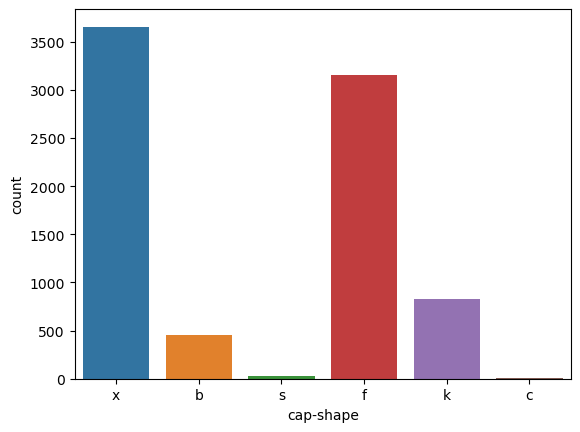

In [108]:
sns.countplot(x="cap-shape",data=df) 

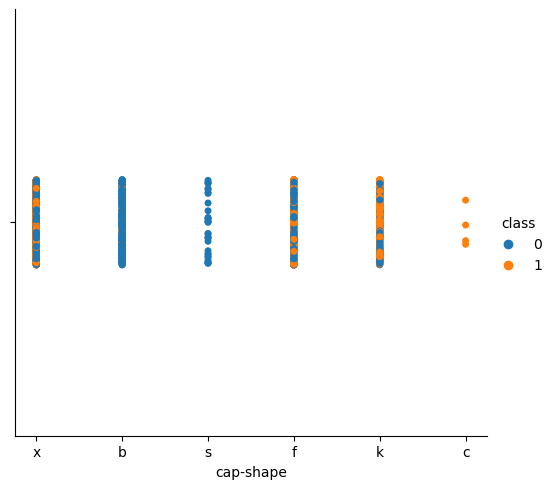

In [109]:
sns.catplot(x="cap-shape",hue="class",data=df)

In [110]:
df["cap-shape"]=df["cap-shape"].replace("s","b")

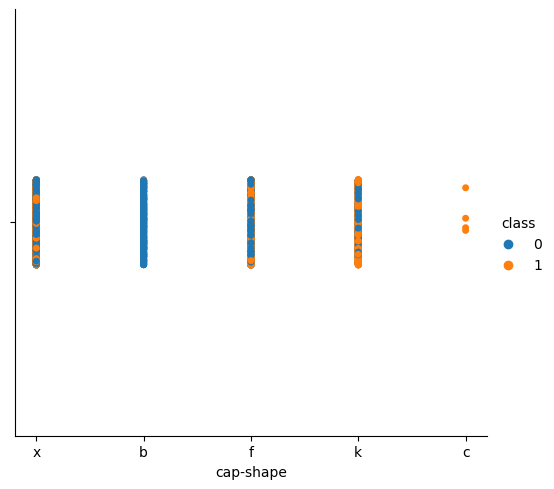

In [111]:
sns.catplot(x="cap-shape",hue="class",data=df)

In [112]:
df["cap-color"].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

<Axes: xlabel='cap-color', ylabel='count'>

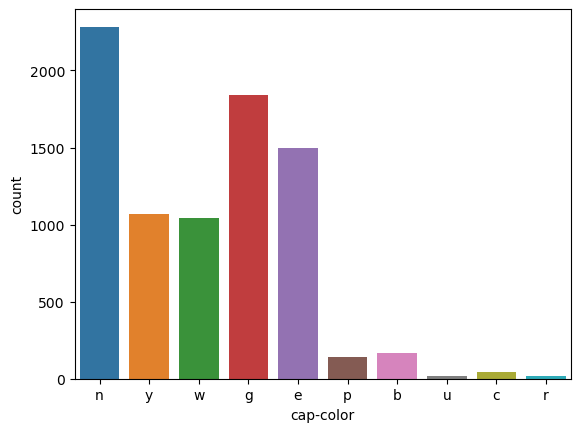

In [113]:
sns.countplot(x="cap-color",data=df) 

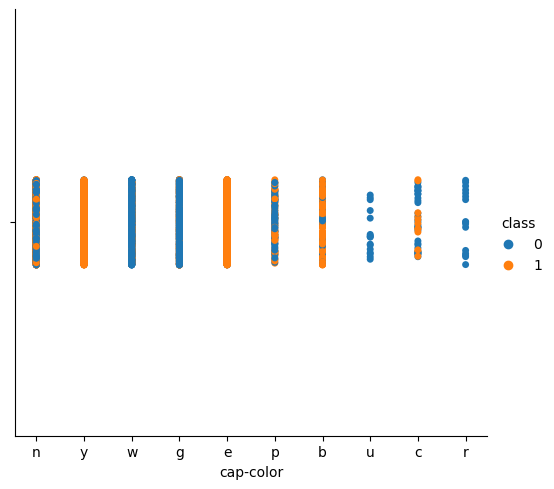

In [114]:
sns.catplot(x="cap-color",hue="class",data=df)

In [115]:
df["cap-color"]=df["cap-color"].replace("y","e")

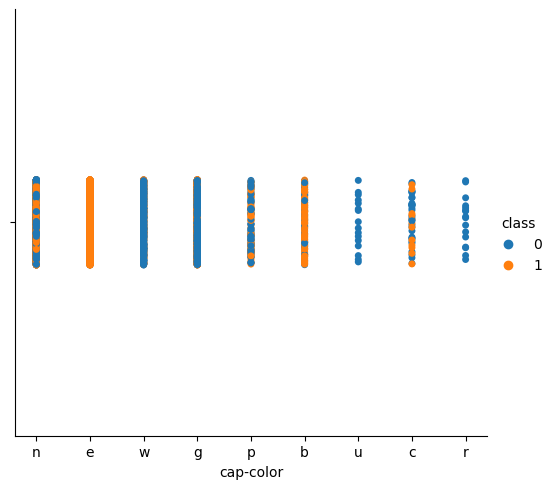

In [116]:
sns.catplot(x="cap-color",hue="class",data=df)

In [117]:
df["cap-surface"].value_counts()

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

<Axes: xlabel='cap-surface', ylabel='count'>

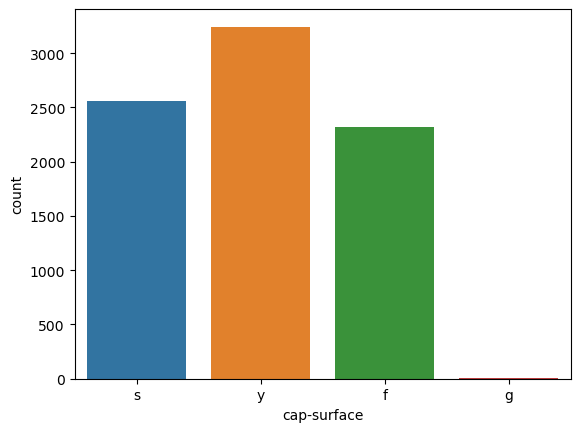

In [118]:
sns.countplot(x="cap-surface",data=df) 

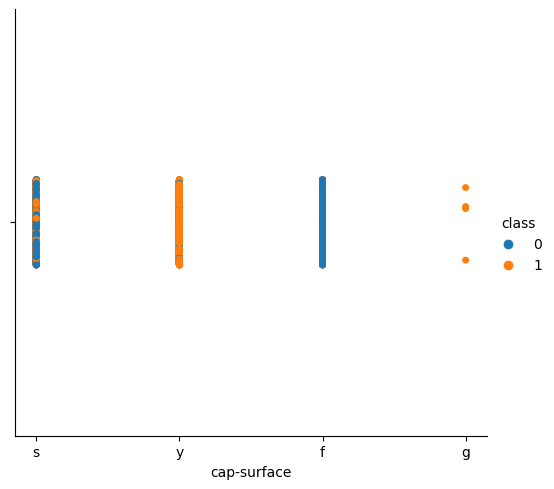

In [119]:
sns.catplot(x="cap-surface",hue="class",data=df)

In [120]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,4,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,4,2,2,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,4,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,4,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [ ]:
# spliting input and target
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
LR =LogisticRegression()
LR.fit(X_train,y_train)
LR_pred =LR.predict(X_test)
print(accuracy_score(y_test,LR_pred))
print(confusion_matrix(y_test,LR_pred))
print(classification_report(y_test,LR_pred))

In [ ]:
RF=RandomForestClassifier(random_state=42)
RF.fit(X_train,y_train)
y_pred =RF.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred =svc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# conclusion
-As Random Forest Classifier gives very good Result on test data,We have selected Random Forest